<h1 style="color:red;text-align:center;font-size:50px">Cálculo de Área de un Círculo</h1>

# 🎯 Estimación del Área de un Círculo sin Conocer su Fórmula  

En este ejercicio, aprenderemos a estimar el área de un círculo 🟠 sin necesidad de conocer su fórmula matemática.  

## 📌 Contexto  

Imaginemos un círculo inscrito dentro de un cuadrado 🔲 de lado $l$. Aunque desconocemos la ecuación que determina el área del círculo, sí sabemos que el área del cuadrado se calcula como:  

$$
A_{\text{cuadrado}} = l^2
$$

Donde:  
- $l$ es la longitud del lado del cuadrado.  

Para estimar el área del círculo sin recurrir a fórmulas conocidas, utilizaremos un método basado en **muestreo aleatorio** 🎲. La idea es sencilla:  

Si colocamos puntos aleatorios dentro del cuadrado, la cantidad de puntos que caigan dentro del círculo será proporcional a su área, **suponiendo una distribución uniforme** de los puntos.  

🔢 **Matemáticamente, esto se expresa como:**  

$$
\frac{A_{\text{círculo}}}{A_{\text{cuadrado}}} \approx \frac{\text{Puntos dentro del círculo} 🎯}{\text{Puntos totales en el cuadrado} 🔲}
$$

De aquí, podemos despejar el área del círculo:  

$$
A_{\text{círculo}} \approx \left( \frac{\text{Puntos dentro del círculo} 🎯}{\text{Puntos dentro del cuadrado} 🔲} \right) \times A_{\text{cuadrado}}
$$

✅ **Conclusión:** Este método nos permite estimar el área de un círculo y de cualquier otra figura, sin necesidad de conocer su ecuación exacta.  



# 📌 Ejecución  

En este ejemplo, consideraremos un cuadrado de lado \(3\) y un círculo de radio \(1\). Aunque no es necesario conocer el radio del círculo para estimar su área, disponer de este valor nos permitirá comparar la estimación obtenida con el área real.  

Sabemos de antemano que el área del círculo se calcula con la fórmula:  

$$
A_{\text{círculo}} = \pi r^2
$$

En nuestro caso particular:  

$$
A_{\text{círculo}} = \pi \times 1^2 \approx 3.142
$$

A partir de esta información, evaluaremos qué tan precisa es la estimación obtenida con el método propuesto en dos escenarios diferentes:  

1️⃣ **Muestreo con solo 5 puntos.**  
2️⃣ **Muestreo con 1000 puntos.**  

Esto nos permitirá analizar cómo varía la precisión de la estimación en función del número de puntos utilizados.  


In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np 

In [2]:
"""
Se crea un objeto llamado "Area_circulo_inscrito", que incluye 
una función para graficar los elementos y otra para calcular el área del círculo.
"""

class Area_circulo_inscrito():

    def __init__(self,radio,lado_cuadrado,numero_puntos):

        self.radio = radio 
        self.lado_cuadrado = lado_cuadrado 
        self.numero_puntos = numero_puntos
        
    def mostrar(self):
        fig, ax = plt.subplots()
     
        circulo = patches.Circle((0,0),self.radio, fill=False, color='red', linewidth=2) 
        ax.add_patch(circulo)
        
        lado_cuadrado = 3
        cuadrado = patches.Rectangle((-self.lado_cuadrado/2,-self.lado_cuadrado/2),self.lado_cuadrado,self.lado_cuadrado, fill=False, color='blue', linewidth=2) 
        ax.add_patch(cuadrado)
        
        #Se establece ratio de aspecto
        ax.set_aspect('equal') 
        
        #Eliminar ticks de los ejes 
        ax.set_xticks([])
        ax.set_yticks([])
        
        
        #simulando puntos aleatorios 
    
        self.x = np.random.uniform(-self.lado_cuadrado/2,self.lado_cuadrado/2,size=self.numero_puntos)
        self.y = np.random.uniform(-self.lado_cuadrado/2,self.lado_cuadrado/2,size=self.numero_puntos) 
        
        plt.scatter(self.x,self.y,color='purple')
        plt.show()
        
    def estimar(self):
        
        en_circulo = np.sum(self.x**2+self.y**2 <= self.radio**2) #determinar cantidad de puntos dentro del circulo 
        area_circulo = (en_circulo/self.numero_puntos)*(self.lado_cuadrado)**2

        return en_circulo, area_circulo 

# 👇 Caso para 5 puntos

In [3]:
caso_5puntos = Area_circulo_inscrito(1,3,5)

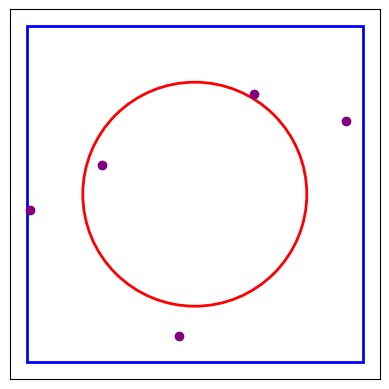

In [4]:
caso_5puntos.mostrar()

In [5]:
print(f'Cantidad de puntos dentro del círculo: {caso_5puntos.estimar()[0]}\n'
      f'Área estimada: {caso_5puntos.estimar()[1]}')

Cantidad de puntos dentro del círculo: 1
Área estimada: 1.8


## ☝️ Baja precisión con 5 puntos  

Observamos que, al considerar solo **5 puntos**, el área estimada es **1.8**, lo que difiere significativamente del área real del círculo (**≈ 3.142**).  

Esto ocurre porque, con un número tan reducido de muestras, la estimación es poco precisa y presenta una alta variabilidad, lo que impide obtener una buena aproximación del área real.  



# 👇 Caso para 1000 puntos

In [9]:
caso_1000puntos = Area_circulo_inscrito(1,3,1000)

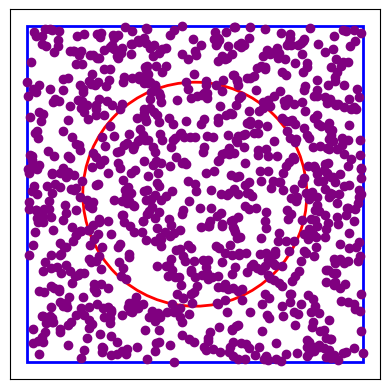

In [10]:
caso_1000puntos.mostrar()

In [11]:
print(f'Cantidad de puntos dentro del círculo: {caso_1000puntos.estimar()[0]}\n'
      f'Área estimada: {caso_1000puntos.estimar()[1]}')

Cantidad de puntos dentro del círculo: 342
Área estimada: 3.0780000000000003


## ☝️ Precisión con 1000 puntos  

Observamos que, al considerar **1000 puntos**, el área estimada es **3.078**, lo cual es bastante aproximado al área real del círculo (**≈ 3.142**).  

Esto sucede porque, a medida que aumenta la cantidad de muestras, la precisión del método mejora significativamente, reduciendo la variabilidad y proporcionando una mejor aproximación del área real. 📈✅  


## 🏁 Conclusión  

Este método puede aplicarse a **cualquier tipo de figura**, no estando limitado únicamente a las circunferencias. De manera similar, los métodos de **muestreo aleatorio** también pueden emplearse para estimar **volúmenes** y, por supuesto, en **análisis de riesgos**, como en el caso del **método de Monte Carlo**. 🎲📊  

🔹 **Nota:** Cada vez que se ejecuten las líneas de código, se obtendrán nuevas estimaciones debido a la naturaleza aleatoria del proceso. 🔄  
